Programming the bernstein vazirani algorithm. The algorithm can determine a secret 'n' bit string in one shot. The classical computer does this in O(n) time.

In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [1]:
 secretnumber = '101001'

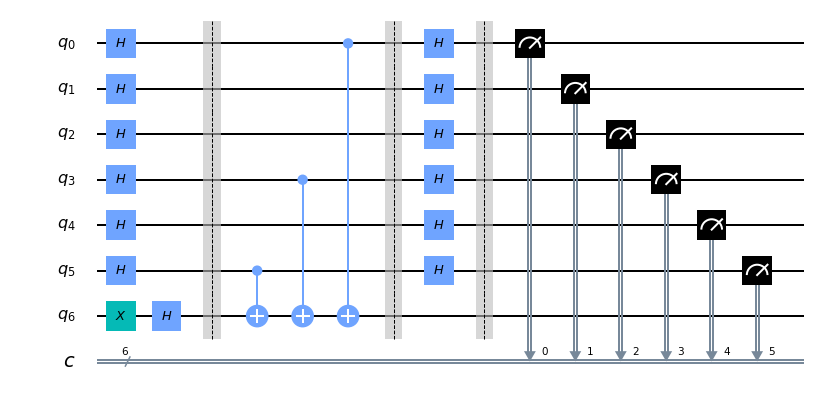

In [8]:
circuit = QuantumCircuit(6+1,6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)

circuit.barrier()

#putting a cx gate at all those positions where there is a 1.
#encoding the secret number this way

circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()
circuit.h([0,1,2,3,4,5])

circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output = 'mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


Generalising for any secret number now

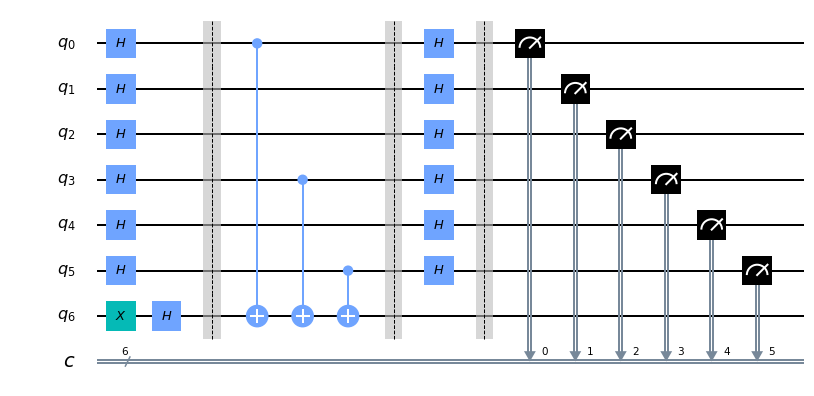

In [13]:
circ = QuantumCircuit(len(secretnumber) + 1, len(secretnumber))
circ.h(range(len(secretnumber)))
circ.x(len(secretnumber))
circ.h(len(secretnumber))

circ.barrier()

#putting a cx for every '1' in the secret number
for ii, yesno in enumerate(reversed(secretnumber)):
    if(yesno == '1'):
        circ.cx(ii,len(secretnumber))

circ.barrier()

#putting hadamards and final measurement
circ.h(range(len(secretnumber)))
circ.barrier()
circ.measure(range(len(secretnumber)), range(len(secretnumber)))
circ.draw(output = 'mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator, shots = 1).result()
counts = result.get_counts()
print